In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# now include a heavy-tailed resting time and see what happens.

In [2]:
def walkit(k1=1.0,a=1.5, m=1.0,v=1.0,tmax=10,theta0=0.5,theta1=0.5):
    """
    k0 is the inverse mean resting time
    m is the mode of the pareto distribution
    a is the pareto tail parameter
    v is the velocity
    tmax is the maximum time to walk
    theta0 is the probability of starting at rest
    theta1 is the probability of starting in motion
    """
    S = []
    T = []
    s = int(np.random.random() > theta0) # initial state
    t = 0.0 # initial time
    T.append(t)
    S.append(s)
    while t<tmax:
        if s==0:
            #t = t + np.random.exponential(1/k0)
            t = t + (np.random.pareto(a) + 1) * m
            S.append(s)            
            s = 1
            T.append(t)
        elif s==1:
            t = t + np.random.exponential(1/k1)
            S.append(s)            
            s = 0
            T.append(t)
    return np.array(T),np.array(S)

def plotit(walk):
    t,s = walk
    widths = np.diff(t)
    plt.bar(t[:-1],s[:-1]+1,width=widths,edgecolor='black',facecolor='purple',align='edge',zorder=-1)
    
def dispit(walk,ts,v=1.0):
    t,xs = walk
    i = np.searchsorted(t,ts,side='left')
    xs = xs[i]
    dt = ts[1]-ts[0]
    xs = (xs*v*dt).cumsum()
    return xs

def ensit(n=10,a=1.5,m=3.0,k1=1.0,dt=1e-1,v=1.0,tmax=10,theta0=0.5,theta1=0.5):
    T = np.arange(0,tmax,dt)
    X = []
    for i in range(n):
        walk = walkit(a=a,m=m,k1=k1,v=v,tmax=tmax,theta0=theta0,theta1=theta1)
        x = dispit(walk,T,v=v)
        X.append(x)
    X = np.array(X)
    return T,X

def statsit(ensemble):
    T,X = ensemble
    var = X.var(0)
    mean = X.mean(0)
    return T,mean,var

In [ ]:
a, m = 0.5, 3.  # shape and mode
s = (np.random.pareto(a, 1000) + 1) * m
import matplotlib.pyplot as plt
count, bins= np.histogram(s, 100, density=True)
plt.loglog(bins[:-1],count,'x')
plt.xlim(1e-3,1e4)

In [ ]:
tmax = 1000 # max sim time
a = 0.9
walk = walkit(a=a,tmax=tmax)
ts = np.arange(0,tmax,1)
x = dispit(walk,ts)
plt.plot(ts,x)

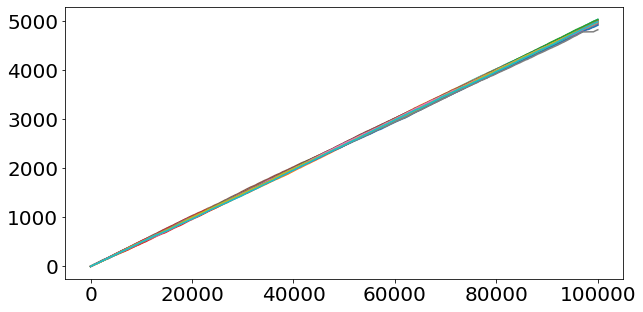

In [9]:
tmax = 100000 # max sim time
n=50 # number of walkers
a = 2.1 # alpha
m = 1 # pareto 
theta0 = 0.5
theta1 = 0.5
k1 = 10
dt = 1e-2
ens = ensit(tmax=tmax,dt=dt,n=n,a=a,m=m,k1=k1,theta0=theta0,theta1=theta1)
t = ens[0]
for e in ens[1][:20]:
    plt.plot(t,e)
    
def ex(a):
    if a<=1:
        out = 2*a
    elif (a>1)and(a<2):
        out = 3-a
    elif a>=2:
        out = 1
    return out

/home/kpierce/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


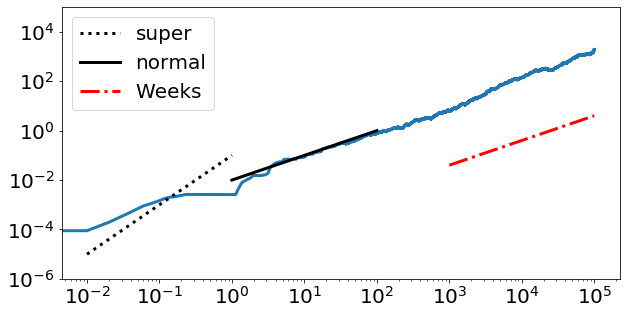

In [10]:
t,m,v = statsit(ens)
plt.loglog(t,v,lw=3)

t0 = np.geomspace(1e-2,1,100)
plt.loglog(t0,t0**2/10,color='black',label='super',linestyle=':',lw=3)
t1 = np.geomspace(1,1e2)
plt.loglog(t1,t1*1e-2,color='black',label='normal',lw=3)
plt.ylim(1e-6,100000)

t2 = np.geomspace(1e3,1e5,100)
plt.loglog(t2,t2**ex(a)/2.5e4,color='red',lw=3,linestyle='-.',label='Weeks')
plt.legend()